# 1. Importing Necessary Libraries

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import random

#for reprocessing
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

os.chdir('..')

# 2. Importing Dataset and basic data check

In [2]:
df = pd.read_csv('./data/cleaned_data.csv', index_col=0)
df.dropna(inplace = True)

print('Data Shape: ', df.shape)
df.head()

Data Shape:  (943539, 1)


,content
0,far kinda look like world go let russia run ro...
5,russia russia apparently perpetual aggressor i...
7,russia take capitol ukraine ukraine russia
8,bingo since bachelor ir brazil talk wests faul...
9,russia pull us iraq difference reason war ukra...


# 3. Data Processing and Transformation

In [3]:
df = df.sample(5000, random_state=42)
print('Data shape: ',df.shape)
df.head()

Data shape:  (5000, 1)


,content
590827,break russias defence ministry say force captu...
1888596,absolute fascism disgrace remove rt hotbird eu...
699426,may 2020 us withdraw open sky treaty nato move...
2049537,government podemos emerge militarist pronato p...
1544406,didnt impose sanction us invade iraq reason co...


### 3.1 Bag of Words Model

In [4]:
cv = CountVectorizer(ngram_range=(1,1), analyzer='word', min_df=10)
X1 = cv.fit_transform(df['content'])
X1 = X1.astype('int8')
print('Shape of Data Matrix for Bag of words model: ', X1.shape)
print(random.sample(list(cv.get_feature_names_out()), 10))

Shape of Data Matrix for Bag of words model:  (5000, 1233)
['focus', 'indians', 'india', 'attention', 'best', 'republicans', 'rather', 'hypocrisy', 'east', 'round']


### 3.2 N-gram Model

In [5]:
cv = CountVectorizer(ngram_range=(2,2), analyzer='word', min_df=10)
X2 = cv.fit_transform(df['content'])
print('Shape of Data Matrix for N-gram model(n=2): ', X2.shape)
print(random.sample(list(cv.get_feature_names_out()), 10))

Shape of Data Matrix for N-gram model(n=2):  (5000, 381)
['arm force', 'new york', 'president putin', 'russia destroy', 'russia move', 'russiaukraine saveukraine', 'make sense', 'russia ukrainerussiawar', 'give russia', 'russia say']


### 3.3 TF-IDF Model

In [6]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df=50)
X3 = tfidf.fit_transform(df['content'])
print('Shape of Data Matrix for TF-IDF model: ', X3.shape)
print(random.sample(list(tfidf.get_feature_names_out()), 10))

Shape of Data Matrix for TF-IDF model:  (5000, 226)
['remember', 'another', 'happen', 'price', 'point', 'bio', 'still', 'president', 'standwithukraine', 'ukraines']


### 3.4 TF-IDF N-gram Model

In [7]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(2,2), min_df=10)
X4 = tfidf.fit_transform(df['content'])
print('Shape of Data Matrix for TF-IDF N-gram model(n=2): ', X4.shape)
print(random.sample(list(tfidf.get_feature_names_out()), 10))

Shape of Data Matrix for TF-IDF N-gram model(n=2):  (5000, 381)
['innocent people', 'un security', 'ukraine attack', 'also bio', 'nuclear war', 'volodymyr zelensky', 'ukraine invasion', 'ukraine sanction', 'win war', 'ukraine continue']


### 3.5 TF-IDF with mixture of N-Gram

In [8]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df=20)
X5 = tfidf.fit_transform(df['content'])
print('Shape of Data Matrix for TF-IDF and mixture of N-gram model(n=1,2,3): ', X5.shape)
print(random.sample(list(tfidf.get_feature_names_out()), 10))

Shape of Data Matrix for TF-IDF and mixture of N-gram model(n=1,2,3):  (5000, 814)
['citizens', 'russia launch', 'russiaukraineconflict', 'security council', 'amp ukraine', 'lead', 'russianukrainianwar', 'stop war', 'president vladimir', 'problem']


# 4. Dimension Reduction

In [9]:
# For Bag of words Model
pca = PCA(n_components=0.9, svd_solver='full')
X1_transformed = pca.fit_transform(X1.A)
    
# explained_variance = pca.explained_variance_ratio_
print('Dimmernsion before PCA: ', X1.shape)
print('Dimmernsion after PCA: ', X1_transformed.shape)

Dimmernsion before PCA:  (5000, 1233)
Dimmernsion after PCA:  (5000, 648)


In [10]:
# For N-gram Model
pca = PCA(n_components=0.9, svd_solver='full')
X2_transformed = pca.fit_transform(X2.A)
    
# explained_variance = pca.explained_variance_ratio_
print('Dimmernsion before PCA: ', X2.shape)
print('Dimmernsion after PCA: ', X2_transformed.shape)

Dimmernsion before PCA:  (5000, 381)
Dimmernsion after PCA:  (5000, 229)


In [11]:
# For TF-IDF Model
pca = PCA(n_components=0.9, svd_solver='full')
X3_transformed = pca.fit_transform(X3.A)
    
# explained_variance = pca.explained_variance_ratio_
print('Dimmernsion before PCA: ', X3.shape)
print('Dimmernsion after PCA: ', X3_transformed.shape)

Dimmernsion before PCA:  (5000, 226)
Dimmernsion after PCA:  (5000, 174)


In [12]:
# For TF-IDF N-gram Model
pca = PCA(n_components=0.9, svd_solver='full')
X4_transformed = pca.fit_transform(X4.A)
    
# explained_variance = pca.explained_variance_ratio_
print('Dimmernsion before PCA: ', X4.shape)
print('Dimmernsion after PCA: ', X4_transformed.shape)

Dimmernsion before PCA:  (5000, 381)
Dimmernsion after PCA:  (5000, 249)


In [13]:
# For TF-IDF and Mixture of N-gram Model
pca = PCA(n_components=0.9, svd_solver='full')
X5_transformed = pca.fit_transform(X5.A)
    
# explained_variance = pca.explained_variance_ratio_
print('Dimmernsion before PCA: ', X5.shape)
print('Dimmernsion after PCA: ', X5_transformed.shape)

Dimmernsion before PCA:  (5000, 814)
Dimmernsion after PCA:  (5000, 523)


# 5. K-means Clusterring 

In [18]:
def plot_WSS(points, kmax, kind, file_path):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters=k, max_iter=50000).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
        # calculate square of Euclidean distance of each point 
        # from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
        sse.append(curr_sse)
    
    plt.style.use('ggplot')
    plt.figure(figsize=(9,5))
    plt.plot(sse)
    plt.title(f'Finding Optimum Number of Clusters using Elbow Method\n({kind} Model)', color='k', size=16)
    plt.xticks(range(0, kmax, 2), np.arange(1, kmax+1, 2))
    plt.xlabel('Number of clusters', color='k', size=14)
    plt.ylabel('Within cluster sum of squares', color='k', size=14)
    if file_path:
        plt.savefig(file_path)
    plt.show()

In [19]:
def plot_sil(points, kmax, kind, file_path):
    sil = []
    
    # dissimilarity would not be defined for a single cluster, 
    # thus, minimum number of clusters should be 2
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k,max_iter = 10000).fit(points)
        labels = kmeans.labels_
        sil.append(silhouette_score(points, labels, metric = 'euclidean'))
    
    plt.style.use('ggplot')
    plt.figure(figsize = (9,5))
    plt.plot(sil)
    plt.title(f'Finding Optimum Number of Clusters using silhouette score\n({kind} Model)', color='k', size=16)
    plt.xticks(range(0, kmax, 2), np.arange(1, kmax+1, 2))
    plt.xlabel('Number of clusters', color='k', size=14)
    plt.ylabel('silhouette score', color='k', size=14) # Within cluster sum of squares
    if file_path:
        plt.savefig(file_path)
    plt.show()

## 5.1 Finding value of K using Elbow plot

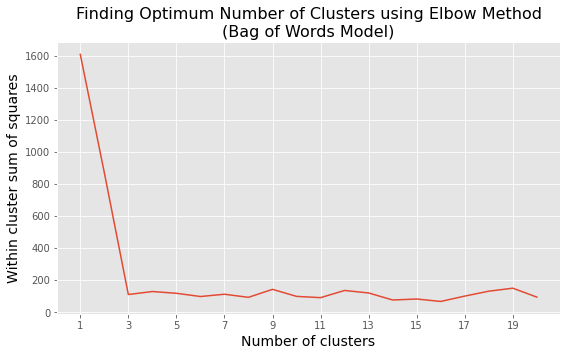

In [21]:
# For Bag of Words Model
plot_WSS(X1_transformed, 20, 'Bag of Words', './images/elbow-bow.png')

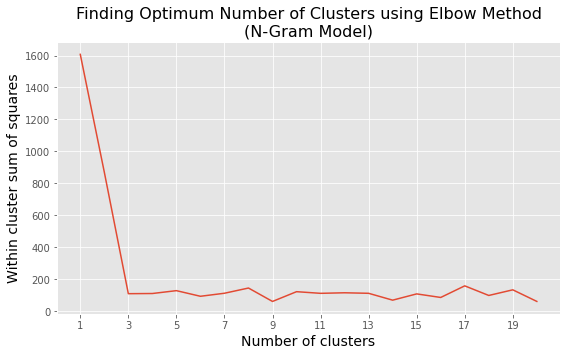

In [23]:
# For N-Gram Model
plot_WSS(X2_transformed, 20, 'N-Gram', './images/elbow-ng.png')

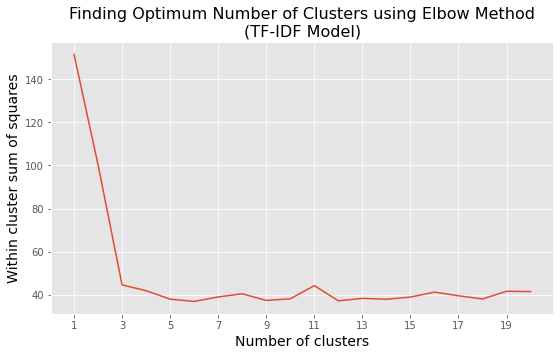

In [26]:
# For TF-IDF model
plot_WSS(X3_transformed, 20, 'TF-IDF', './images/elbow-tfidf.png')

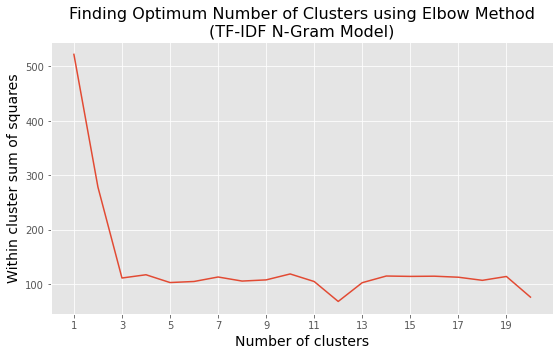

In [27]:
# For TF-IDF N-Gram Model
plot_WSS(X4_transformed,20, 'TF-IDF N-Gram', './images/elbow-tfidf-ng.png')

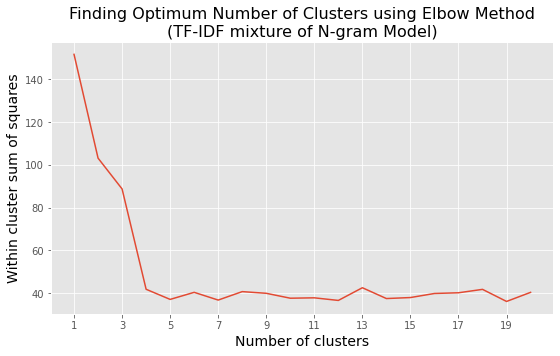

In [28]:
# For TF-IDF mixture of N-gram Model
plot_WSS(X5_transformed, 20, 'TF-IDF mixture of N-gram', './images/elbow-tfidf-mix.png')

## 5.2 Finding value of K using Silhouette method

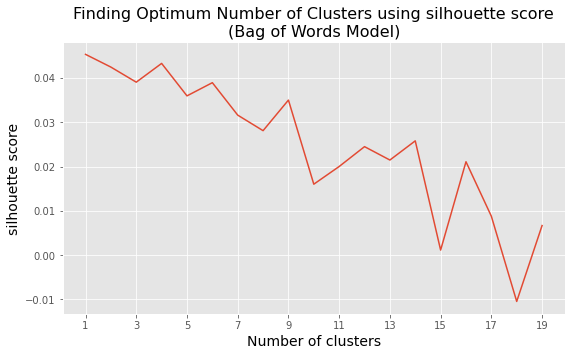

In [29]:
# For Bag of Words Model
plot_sil(X1_transformed, 20, 'Bag of Words', './images/sil-bow.png')

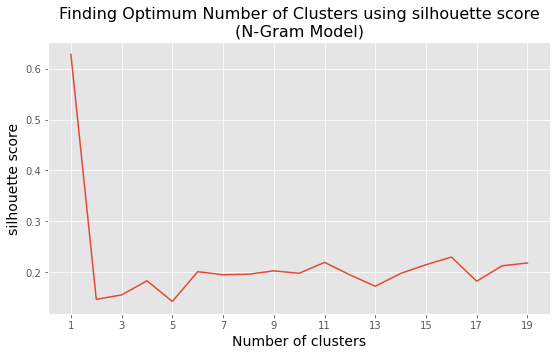

In [30]:
# For N-Gram Model
plot_sil(X2_transformed, 20, 'N-Gram', './images/sil-ng.png')

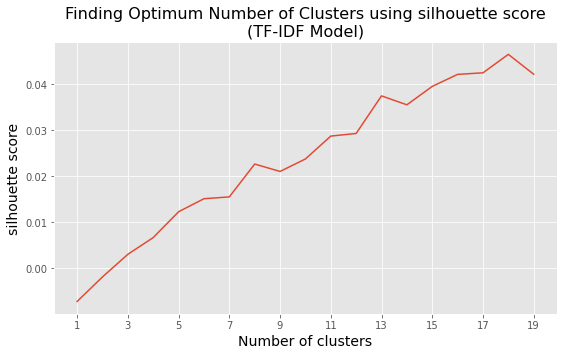

In [31]:
# For TF-IDF Model
plot_sil(X3_transformed, 20, 'TF-IDF', './images/sil-tfidf.png')

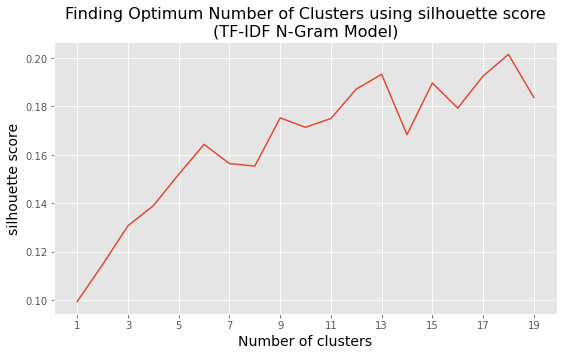

In [32]:
# For TF-IDF N-Gram Model
plot_sil(X4_transformed, 20, 'TF-IDF N-Gram', './images/sil-tfidf-ng.png')

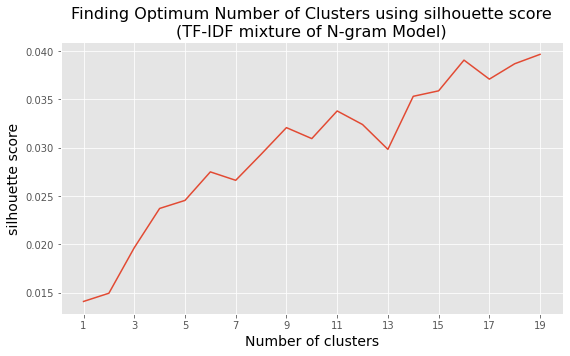

In [33]:
# For TF-IDF mixture of N-gram Model
plot_sil(X5_transformed, 20, 'TF-IDF mixture of N-gram', './images/sil-tfidf-mix.png')

## 5.3 Final Model

In [14]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 10000)
model.fit(X1_transformed)
labels = model.predict(X1_transformed)

df['label'] = labels
df.head()

,content,label
590827,break russias defence ministry say force captu...,2
1888596,absolute fascism disgrace remove rt hotbird eu...,2
699426,may 2020 us withdraw open sky treaty nato move...,2
2049537,government podemos emerge militarist pronato p...,1
1544406,didnt impose sanction us invade iraq reason co...,2


In [15]:
print("Cluster sizes:")
df.label.value_counts()

Cluster sizes:


2    3205
1    1039
0     756
Name: label, dtype: int64

In [16]:
import json

cluster_indices = {
    int(i): list(df.loc[df.label == i].index)
    for i in df.label.unique()
}
with open('./data/cluster_indices.json','w') as fp:
    json.dump(cluster_indices, fp)

In [23]:
all_data = pd.read_csv('./data/all_data.csv', index_col=0)

for k, v in cluster_indices.items():
    all_data.loc[v].to_csv(f'./clusters/cluster-{k}.csv')

# 6. WordCLoud

In [24]:
from wordcloud import WordCloud

all_words = ' '
stopwords = set(stopwords.words('english'))

for val in df.content:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    all_words += " ".join(tokens)+" "

In [25]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_words)

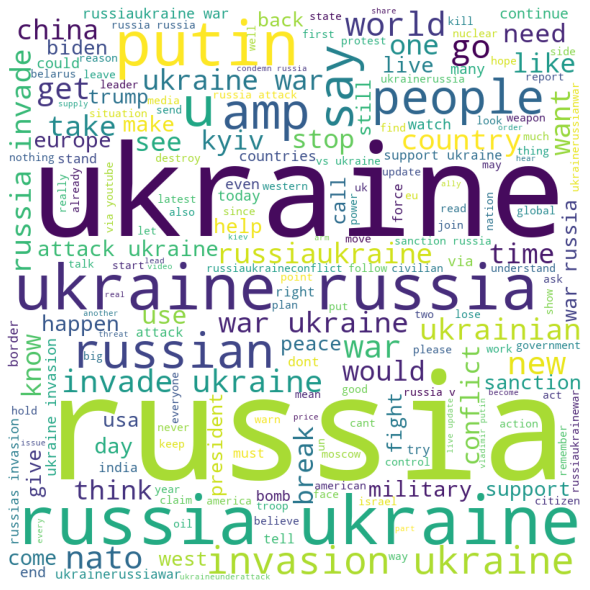

In [29]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()